# Feature Engineering - Symptoms

In this section, we perform **feature engineering** on the `Symptoms` column.  
The goal is to convert raw text-based symptom information into **structured features**
that can be used by machine learning models.

### Steps:
1. Handle missing values in `Symptoms`.
2. Split symptom strings into individual items.
3. Encode symptoms using **MultiLabelBinarizer** (one column per symptom).
4. Merge the new features back into the dataset.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Load dataset
df = pd.read_csv("/stroke_prediction_dataset.csv")

In [ ]:
#Handle Missing Values
df["Symptoms"] = df["Symptoms"].fillna("No Symptoms")
df.head(12)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
5,29307,Advika Kota,62,Female,0,0,Single,Private,Urban,91.60,...,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke
6,25525,Elakshi Karan,40,Female,1,0,Married,Private,Urban,77.83,...,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",No Symptoms,No Stroke
7,4809,Shalv Dugar,61,Female,0,1,Divorced,Government Job,Rural,194.73,...,Rarely,Moderate,1,No,Vegan,5.85,179/72,"HDL: 66, LDL: 134",Loss of Balance,Stroke
8,7372,Raghav Handa,72,Female,1,1,Married,Self-employed,Rural,72.99,...,Rarely,High,1,No,Vegetarian,0.73,141/106,"HDL: 71, LDL: 140","Loss of Balance, Dizziness, Difficulty Speaking",Stroke
9,37504,Krish Kulkarni,82,Male,0,0,Divorced,Self-employed,Urban,111.23,...,Rarely,High,1,Yes,Non-Vegetarian,8.39,119/88,"HDL: 32, LDL: 88",No Symptoms,No Stroke


In [ ]:
#Split Symptoms into List
df["Symptoms_List"] = df["Symptoms"].apply(lambda x: [s.strip() for s in x.split(",")])

#Multi-label Binarization
mlb = MultiLabelBinarizer()
symptom_features = mlb.fit_transform(df["Symptoms_List"])

# Create a new DataFrame with symptom columns
symptom_df = pd.DataFrame(symptom_features, columns=mlb.classes_)

#Merge Back with Dataset
df = pd.concat([df, symptom_df], axis=1)

In [ ]:
#Preview results
print("Original Symptoms column:")
print(df["Symptoms"].head(), "\n")

print("New Symptom-based Features:")
print(symptom_df.head())

Original Symptoms column:
0                        Difficulty Speaking, Headache
1      Loss of Balance, Headache, Dizziness, Confusion
2                                  Seizures, Dizziness
3    Seizures, Blurred Vision, Severe Fatigue, Head...
4                                  Difficulty Speaking
Name: Symptoms, dtype: object 

New Symptom-based Features:
   Blurred Vision  Confusion  Difficulty Speaking  Dizziness  Headache  \
0               0          0                    1          0         1   
1               0          1                    0          1         1   
2               0          0                    0          1         0   
3               1          1                    0          0         1   
4               0          0                    1          0         0   

   Loss of Balance  No Symptoms  Numbness  Seizures  Severe Fatigue  Weakness  
0                0            0         0         0               0         0  
1                1            0   

<Axes: title={'center': 'Symptom Frequencies'}>

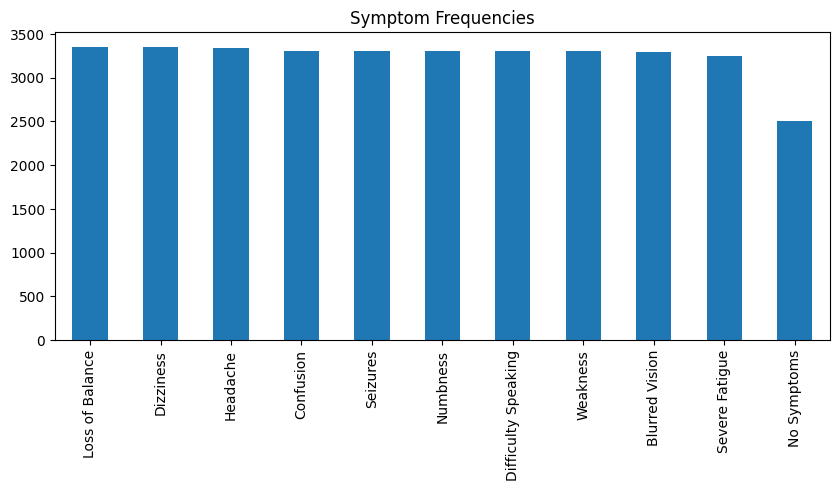

In [ ]:
symptom_counts = symptom_df.sum().sort_values(ascending=False)
symptom_counts.plot(kind='bar', figsize=(10,4), title="Symptom Frequencies")